# Portfolio Analysis

In [1]:
from portfolio_projection_tools import pp_tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

figsize = (15, 8)
mpl.style.use('ggplot')

Get the Prices for the ETFs

In [2]:
formatted_prices = 'C:/Users/David/AppData/Local/Programs/Python/Python37/Scripts/cv_projects/formatted_prices.csv'
formatted_prices = pd.read_csv(formatted_prices, index_col=0)
formatted_prices = formatted_prices.ffill(axis = 0).fillna(0)
prices = formatted_prices[['ISF.L','VMID.L','IUSA.L','VERX.L','IAPD.L','EMIM.L','IGLT.L','CRHG.L','SGLN.L']]
prices = prices.tail(365)
prices.head(5)

,ISF.L,VMID.L,IUSA.L,VERX.L,IAPD.L,EMIM.L,IGLT.L,CRHG.L,SGLN.L
2018-06-08,7.693,33.82,20.635,25.84,21.5400,22.1500,13.00,4.97,19.0450
2018-06-11,7.755,34.12,20.775,26.25,21.5925,22.2625,12.99,4.97,19.1075
2018-06-12,7.714,33.96,20.745,26.17,21.5275,22.2150,13.01,4.96,19.0425
2018-06-13,7.713,34.02,20.845,26.27,21.5325,22.2275,13.07,4.96,19.0725
2018-06-14,7.684,34.14,20.730,26.33,21.1675,22.1175,13.12,4.98,19.2250


Show the heat map to look for corrlation between the assets

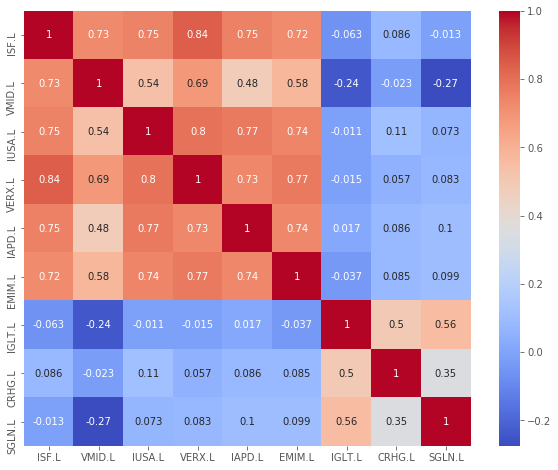

In [3]:
pp_tools.price_heat_map(prices)
plt.show()

Create a dataframe for 5000 random Portfolio weights calculating the Volatility and Returns for each Portfolio

In [4]:
df = pp_tools.portfolio_optimisation_etfs(prices)

Find the Index Location of the Portfolio for either the highest Sharpe Ratio or the the minimum Volatility. In this case the Minimum Volatility.

In [5]:
#Either Minimum Volatility or Maximimum Sharpe Rate
#port_type = pp_tools.highest_sharpe_portfolio_location(df)
port_type = pp_tools.minimum_volatility_portfolio_locations(df)

Return the Portfolio constitution for either the highest Sharpe Ratio or the the minimum Volatility

In [6]:
df1 = df.iloc[[port_type]]
daily_vol = df1['Volatility'].values[0]/100
return_val = df1['Returns'].values[0]
df1

,Returns,Volatility,ISF.L,VMID.L,IUSA.L,VERX.L,IAPD.L,EMIM.L,IGLT.L,CRHG.L,SGLN.L,sharpe
4643,0.02393,0.05657,0.137721,0.191651,0.000679,0.047212,0.021225,0.021407,0.208519,0.206382,0.165203,0.423014


In [7]:
prices = pp_tools.rebase_portfolio(prices)

The Function Portfolio Tester takes the weights of the Portfolio and allocates £10,000 

In [8]:
optimised_portfolio = pp_tools.portfolio_tester(port_type, df, prices)

In [9]:
optimised_portfolio.index = pd.to_datetime(optimised_portfolio['date'])
optimised_portfolio.drop(optimised_portfolio.columns[[0]], axis=1, inplace=True)
optimised_portfolio =  optimised_portfolio/optimised_portfolio.iloc[0, :]
optimised_portfolio.index.name = None

In [10]:
result = pd.concat([prices, optimised_portfolio], axis=1, join='inner')

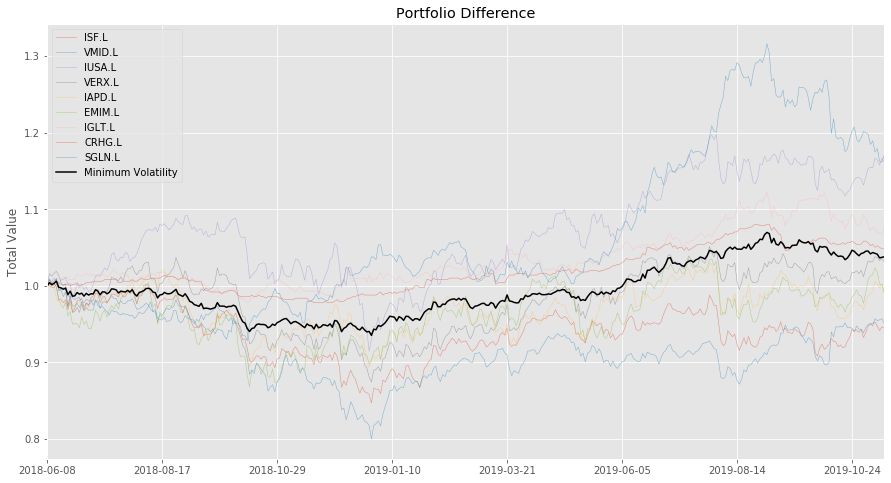

In [11]:
fig, ax = plt.subplots()
result.iloc[:,0:(len(result.columns)-1)].plot(figsize=figsize, ax=ax, alpha=0.6, linewidth=0.5)
result.iloc[:,-1].plot(label='Minimum Volatility',figsize=figsize, color='black', ax=ax)
plt.ylabel('Total Value')
plt.title('Portfolio Difference')
plt.legend(loc='best')
plt.show()